# Multidimensional differential equations

- Börge Göbel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Ball in a bowl: 2 uncoupled harmonic oscillators

We solve the following differential equation:
\\( m\ddot{\vec{r}} = -\xi\dot{\vec{r}}-\nabla U(\vec{r}) + \vec{F}_\mathrm{ext}.\\)

For the profile of the bowl we consider a quadratic function
\\( U(\vec{r}) = U_0 r^2 = U_0 (x^2 + y^2). \\)

The gradient is 
\\( \nabla U(\vec{r}) = 2U_0 \begin{pmatrix}x\\y\end{pmatrix} = 2U_0\vec{r}. \\)

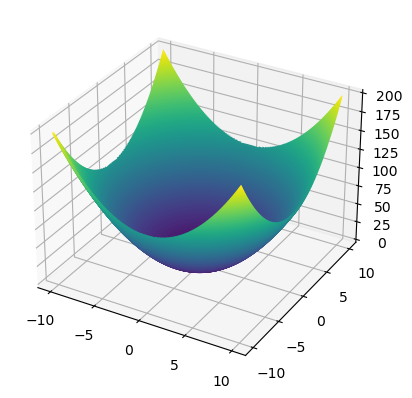

In [2]:
x, y = np.meshgrid(np.linspace(-10,10,201),np.linspace(-10,10,201))
z = x**2 + y**2

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x,y,z,200)

### Revisit 1d harmonic oscillator

In [3]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.1
d = -1.0
omega = 1.0

def f_ODE(t,theta):
    return theta[1], -b*theta[1] - c*np.sin(theta[0]) - d*np.sin(omega*t)

theta00 = 2.0
theta10 = 0.0

solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00, theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

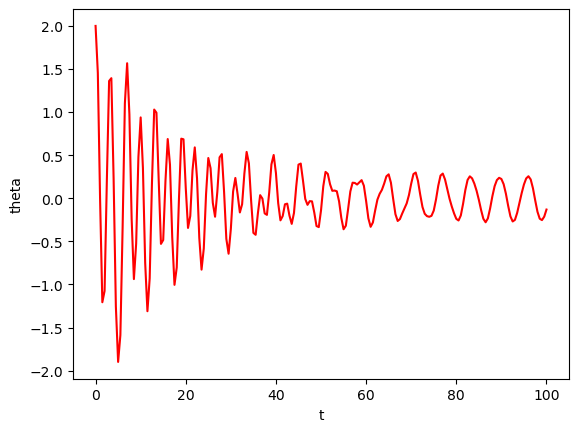

In [4]:
plt.xlabel('Time t')
plt.ylabel('Coordinates x and y')

plt.plot(solution_RK45.t, solution_RK45.y[0], 'red')

**The normal harmonic oscillator is (mathematically) already a two-dimensional example:**

Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

### Ball in a bowl

**Now we have 2 harmonic oscillators. Therefore, mathematically speaking, we have a four-dimensional system**

In [8]:
m = 1
U0 = 1
xi = 0.1

def f_ODE(t,r):
    x, y = r[0:2]
    vx, vy = r[2:4]
    return [vx, vy, - xi/m*vx -2*U0/m*x, -xi/m*vy - 2*U0/m*y]

### Linear trajectory

In [9]:
tStart = 0
tEnd = 100

x0 = 1
y0 = -0.5
vx0 = 0
vy0 = 0

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,1001))

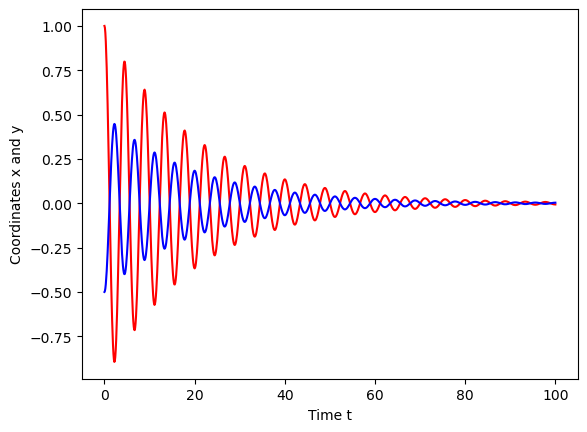

In [11]:
plt.xlabel('Time t')
plt.ylabel('Coordinates x and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')

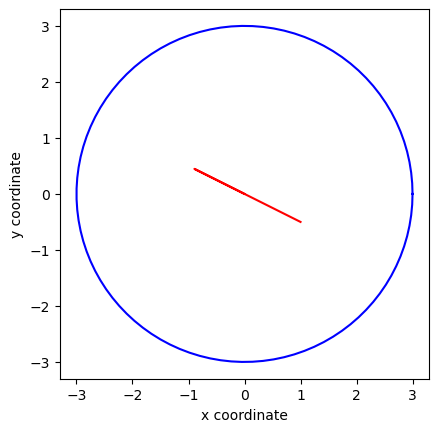

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.plot(solution.y[0], solution.y[1], 'red')

t_array = np.linspace(0, 2*np.pi, 100)
x_array = 3*np.cos(t_array)
y_array = 3*np.sin(t_array)
plt.plot(x_array,y_array, 'blue')

### Elliptical trajectory

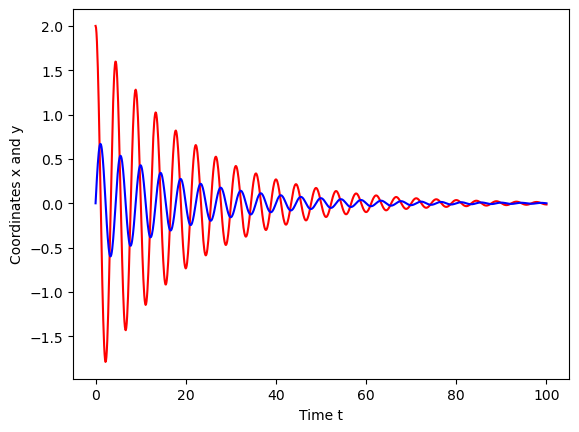

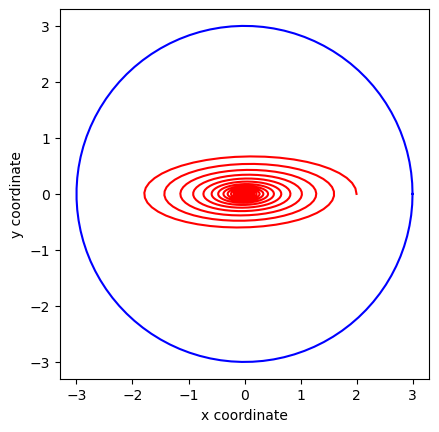

In [13]:
tStart = 0
tEnd = 100

x0 = 2
y0 = 0
vx0 = 0
vy0 = 1

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,1001))

plt.xlabel('Time t')
plt.ylabel('Coordinates x and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.plot(solution.y[0], solution.y[1], 'red')

t_array = np.linspace(0, 2*np.pi, 100)
x_array = 3*np.cos(t_array)
y_array = 3*np.sin(t_array)
plt.plot(x_array,y_array, 'blue')

### External force

In [14]:
m = 1
U0 = 1
xi = 0.1

A0 = 4
tOsc = 50
phi = 45 / 180 *np.pi 

def f_ODE(t,r):
    x, y = r[0:2]
    vx, vy = r[2:4]
    return [vx, vy, -xi/m*vx -2*U0/m*x + A0*np.sin(2*np.pi*t/tOsc)*np.cos(phi), -xi/m*vy -2*U0/m*y + A0*np.sin(2*np.pi*t/tOsc)*np.sin(phi)]

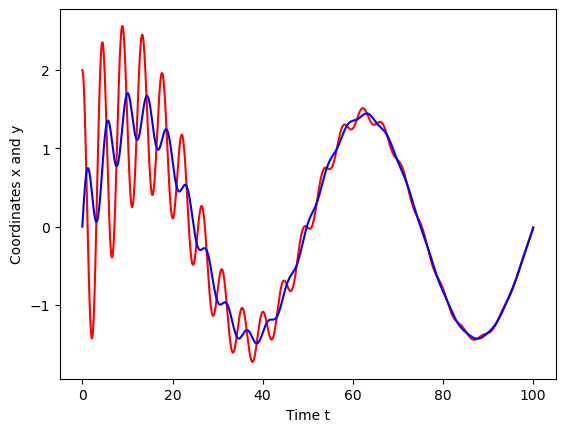

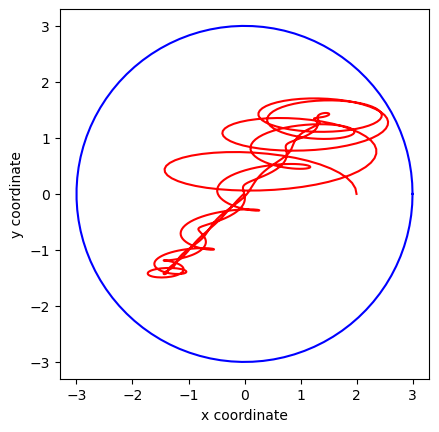

In [15]:
tStart = 0
tEnd = 100

x0 = 2
y0 = 0
vx0 = 0
vy0 = 1

solution = integrate.solve_ivp(f_ODE, [tStart,tEnd], [x0, y0, vx0, vy0], method = 'RK45', t_eval = np.linspace(tStart,tEnd,1001))

plt.xlabel('Time t')
plt.ylabel('Coordinates x and y')

plt.plot(solution.t, solution.y[0], 'red')
plt.plot(solution.t, solution.y[1], 'blue')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.plot(solution.y[0], solution.y[1], 'red')

t_array = np.linspace(0, 2*np.pi, 100)
x_array = 3*np.cos(t_array)
y_array = 3*np.sin(t_array)
plt.plot(x_array,y_array, 'blue')